In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. Importation de la dataset

link = "https://raw.githubusercontent.com/jennykarim45-ai/projet_recommandation_films/refs/heads/main/films_final.csv"

df = pd.read_csv(link)

df.sample(10)

,titre,genres,résumé,temps,année,nombre de votes,votes,acteurs,directeurs,production,id_film,id_genre,poster_url,genre_1,genre_2,genre_3,popularité
1495,Le Banni,"['Western', 'Drame']",Pat Garrett et Doc Holliday sont de vieux amis...,116,05-02-1943,98,5.400,"['Jack Buetel', 'Jane Russell', 'Thomas Mitche...",['Howard Hughes'],"Howard Hughes Productions, RKO Radio Pictures",22613,"[37, 18]",https://image.tmdb.org/t/p/w500/9LncSIqwMATsDI...,Western,Drame,-,3.4539
1947,Boris Godounov,"['Musique', 'Drame', 'Histoire']","A Saint-Pétersbourg en 1874, se joue la premiè...",115,20-12-1989,13,7.500,"['Ruggero Raimondi', 'Kenneth Riegel', 'Pavel ...",['Andrzej Żuławski'],"Erato Films, Compañía Iberoamericana de TV, Av...",99686,"[10402, 18, 36]",https://image.tmdb.org/t/p/w500/9dOCt1HtJaO7p7...,Musique,Drame,Histoire,4.8819
4289,La Douceur du village,['Documentaire'],"François Reichenbach étudie à Loué, petite vil...",47,01-05-1964,1,5.000,[],['François Reichenbach'],Inconnu,408860,[99],https://image.tmdb.org/t/p/w500/pIuf2iO0MDdASN...,Documentaire,-,-,0.9309
604,Amanda,"['Drame', 'Comédie']","Amanda, 24 ans, vit isolée et n'a jamais eu d'...",94,13-10-2022,71,6.430,"['Benedetta Porcaroli', 'Galatéa Bellugi', 'Gi...",['Carolina Cavalli'],"Elsinore Film, Wildside, Tenderstories, Charad...",1004642,"[18, 35]",https://image.tmdb.org/t/p/w500/96Ejikunkn4d5Y...,Drame,Comédie,-,2.6488
1681,Beloved,"['Drame', 'Thriller', 'Horreur', 'Mystère']","Ohio 1873. Sethe, ancienne esclave, a chèremen...",172,16-10-1998,105,5.757,"['Oprah Winfrey', 'Danny Glover', 'Kimberly El...",['Jonathan Demme'],"Touchstone Pictures, Harpo Films, Clinica Este...",39437,"[18, 53, 27, 9648]",https://image.tmdb.org/t/p/w500/1kg5YdsrrEDtFF...,Drame,Thriller,Horreur,5.8202
2515,Cette femme-là,"['Drame', 'Thriller', 'Mystère']","Femme-flic, Michèle Varin ne parvient pas à ou...",100,15-10-2003,17,6.000,"['Josiane Balasko', 'Ange Rodot', 'Aurélien Re...",['Guillaume Nicloux'],Canal+,36069,"[18, 53, 9648]",https://image.tmdb.org/t/p/w500/uyh6XGYkbZV13H...,Drame,Thriller,Mystère,0.2987
360,Adorable Julia,"['Comédie', 'Drame', 'Romance']","Londres, années 30. Julia est une actrice de t...",104,03-09-2004,115,6.413,"['Annette Bening', 'Jeremy Irons', 'Miriam Mar...",['István Szabó'],Serendipity Point Films,18701,"[35, 18, 10749]",https://image.tmdb.org/t/p/w500/wiJp4pN2bYgtWQ...,Comédie,Drame,Romance,5.4966
1478,Banana Split,['Comédie'],Non disponible,90,30-10-1991,0,0.000,"['Joey Marquez', 'John Estrada', 'Michael V.',...",['Joey Marquez'],Mother Studio Films,796546,[35],https://image.tmdb.org/t/p/w500/n8rERURRJTLHQO...,Comédie,-,-,4.8551
1863,Blue Ruin,"['Crime', 'Thriller']","Dwight Evans vit en marge de la société, au bo...",91,25-04-2014,1562,6.790,"['Macon Blair', 'Devin Ratray', 'Amy Hargreave...",['Jeremy Saulnier'],"Paradise City, filmscience, The Lab Of Madness...",188166,"[80, 53]",https://image.tmdb.org/t/p/w500/zB7cPKOyAsXRnn...,Crime,Thriller,-,1.5142
3057,Le Cœur fantôme,['Drame'],Philippe et sa femme se séparent lorsqu'il déc...,87,27-03-1996,6,5.900,"['Luis Rego', 'Maurice Garrel', 'Aurélia Alcaï...",['Philippe Garrel'],"Gemini Films, Why Not Productions",125320,[18],https://image.tmdb.org/t/p/w500/9hLYWvePhXWKLF...,Drame,-,-,2.5824


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4497 entries, 0 to 4496
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titre            4497 non-null   object 
 1   genres           4497 non-null   object 
 2   résumé           4497 non-null   object 
 3   temps            4497 non-null   int64  
 4   année            4497 non-null   object 
 5   nombre de votes  4497 non-null   int64  
 6   votes            4497 non-null   float64
 7   acteurs          4497 non-null   object 
 8   directeurs       4497 non-null   object 
 9   production       4497 non-null   object 
 10  id_film          4497 non-null   object 
 11  id_genre         4497 non-null   object 
 12  poster_url       4497 non-null   object 
 13  genre_1          4497 non-null   object 
 14  genre_2          4497 non-null   object 
 15  genre_3          4497 non-null   object 
 16  popularité       4496 non-null   float64
dtypes: float64(2),

In [ ]:
df.describe()


,temps,nombre de votes,votes,popularité
count,4497.000000,4497.000000,4497.000000,4496.000000
mean,95.558595,401.347565,5.642325,2.981331
std,30.728792,1652.126321,2.197868,6.945569
min,0.000000,0.000000,0.000000,0.000000
25%,86.000000,5.000000,5.300000,0.931125
50%,97.000000,27.000000,6.300000,2.259150
75%,109.000000,137.000000,6.949000,3.664900
max,495.000000,34713.000000,10.000000,242.799300


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
titre,4497,4283,Une bataille après l'autre,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,4497,692,['Drame'],1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
résumé,4497,3690,Non disponible,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temps,4497.0,NaN,NaN,NaN,95.558595,30.728792,0.0,86.0,97.0,109.0,495.0
année,4497,3658,16-05-1989,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre de votes,4497.0,NaN,NaN,NaN,401.347565,1652.126321,0.0,5.0,27.0,137.0,34713.0
votes,4497.0,NaN,NaN,NaN,5.642325,2.197868,0.0,5.3,6.3,6.949,10.0
acteurs,4497,3976,[],313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directeurs,4497,2977,[],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production,4497,3269,Inconnu,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. LE CONSTAT
# On regarde combien on a de lignes
print(f"Nombre total de lignes AVANT nettoyage : {df.shape[0]}")

# On vérifie les chiffres (Count vs Unique)
infos_id = df['id_film'].describe()
print(f"Count (Total) : {infos_id['count']}")
print(f"Unique (Vrais films) : {infos_id['unique']}")

diff = infos_id['count'] - infos_id['unique']
print(f"⚠️ Verdict : Il y a {diff} doublons à supprimer !")

print("-" * 30)

# 2. L'ACTION : SUPPRESSION
# subset=['id_film'] : On enlève les doublons UNIQUEMENT sur la colonne ID
# keep='first' : Si on trouve 2 fois le même ID, on garde le 1er et on supprime les autres.
df_clean = df.drop_duplicates(subset=['id_film'], keep='first')

# 3. LE CONSTAT
print(f"Nombre total de lignes APRÈS nettoyage : {df_clean.shape[0]}")

# Vérification finale
nouvelles_infos = df_clean['id_film'].describe()
print(f"Nouveau Count : {nouvelles_infos['count']}")
print(f"Nouveau Unique : {nouvelles_infos['unique']}")

if nouvelles_infos['count'] == nouvelles_infos['unique']:
    print("✅ SUCCÈS : La base est parfaitement propre (1 ID = 1 Ligne).")

Nombre total de lignes AVANT nettoyage : 4497
Count (Total) : 4497
Unique (Vrais films) : 4272
⚠️ Verdict : Il y a 225 doublons à supprimer !
------------------------------
Nombre total de lignes APRÈS nettoyage : 4272
Nouveau Count : 4272
Nouveau Unique : 4272
✅ SUCCÈS : La base est parfaitement propre (1 ID = 1 Ligne).


In [ ]:
df_clean

,titre,genres,résumé,temps,année,nombre de votes,votes,acteurs,directeurs,production,id_film,id_genre,poster_url,genre_1,genre_2,genre_3,popularité,année_clean,année_num
0,1789,"['Drame', 'Histoire', 'Documentaire']",Film réalisé à partir de l'enregistrement du s...,146,28-05-1974,6,6.600,"['Roland Amstutz', 'Lucia Bensasson', 'Jean-Cl...",['Ariane Mnouchkine'],Les Films Ariane,392469,"[18, 36, 99]",https://image.tmdb.org/t/p/w500/bMWSd1UPhRQtXo...,Drame,Histoire,Documentaire,0.1344,1974,1974
1,18 jours,['Drame'],"Le Caire, du 25 Janvier au 11 février 2011. D...",125,06-09-2011,20,6.875,"['Ahmed Helmy', 'Amr Waked', 'Mona Zaki', 'Nah...","['Yousry Nasrallah', 'Kamla Abu Zekry', 'Sheri...",Inconnu,224486,[18],https://image.tmdb.org/t/p/w500/tgoe4nNQkbqJTS...,Drame,-,-,2.0935,2011,2011
2,1871,"['Drame', 'Histoire']",Non disponible,100,09-09-1990,9,4.500,"['Ana Padrão', 'Roshan Seth', 'John Lynch', 'T...",['Ken McMullen'],Inconnu,254008,"[18, 36]",https://image.tmdb.org/t/p/w500/gfzkJ2YtoCedav...,Drame,Histoire,-,2.0762,1990,1990
3,19,['Drame'],Non disponible,107,29-07-2022,6,5.333,"['Vijay Sethupathi', 'Nithya Menen', 'Indrajit...",['Indhu VS'],Anto Joseph Film Company,766418,[18],https://image.tmdb.org/t/p/w500/i9KffYGqL9vPF6...,Drame,-,-,3.1666,2022,2022
4,1917,"['Guerre', 'Histoire', 'Drame', 'Action']",Pris dans la tourmente de la Première Guerre M...,115,25-12-2019,13097,7.986,"['George MacKay', 'Dean-Charles Chapman', 'Mar...",['Sam Mendes'],"DreamWorks Pictures, Reliance Entertainment, N...",530915,"[10752, 36, 18, 28]",https://image.tmdb.org/t/p/w500/zppHKKEkHg9ZGz...,Guerre,Histoire,Drame,8.9186,2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,El club,"['Drame', 'Mystère', 'Thriller']","Dans une ville côtière du Chili, des prêtres m...",97,28-05-2015,270,6.900,"['Alfredo Castro', 'Roberto Farías', 'Antonia ...",['Pablo Larraín'],Fabula,319995,"[18, 9648, 53]",https://image.tmdb.org/t/p/w500/iz7YMQUFmxONJi...,Drame,Mystère,Thriller,3.5010,2015,2015
4493,El Custodio (le garde du corps),['Drame'],Rubén est le garde du corps du Ministre de la ...,93,04-04-2007,21,6.300,"['Julio Chávez', 'Osmar Núñez', ""Marcelo D'And...",['Rodrigo Moreno'],"Zarlek Producciones, Rizoma Films, Ctrl Z Film...",99896,[18],https://image.tmdb.org/t/p/w500/hsk4kuRPbVxxz5...,Drame,-,-,5.7662,2007,2007
4494,El Dorado,['Western'],"En arrivant à El Dorado, l'aventurier Cole Tho...",126,17-12-1966,558,7.360,"['John Wayne', 'Robert Mitchum', 'James Caan',...",['Howard Hawks'],"Paramount Pictures, Laurel Productions",52998,"[12, 36, 18]",https://image.tmdb.org/t/p/w500/b1Msl7LnDlKfoI...,Western,-,-,6.6441,1966,1966
4495,El Estudiante ou Récit d'une jeunesse révoltée,['Drame'],"Roque, jeune provincial, commence des études à...",111,01-09-2011,24,6.292,"['Esteban Lamothe', 'Romina Paula', 'Ricardo F...",['Santiago Mitre'],"PASTO, La Unión de los Ríos, Wanka Cine, El Pa...",118204,[18],https://image.tmdb.org/t/p/w500/93BK54rXeMhrVb...,Drame,-,-,2.9692,2011,2011


In [ ]:
df_clean.shape

(4272, 19)

In [ ]:
df.columns

Index(['titre', 'genres', 'résumé', 'temps', 'année', 'nombre de votes',
       'votes', 'acteurs', 'directeurs', 'production', 'id_film', 'id_genre',
       'poster_url', 'genre_1', 'genre_2', 'genre_3', 'popularité'],
      dtype='object')

# Top populatité

In [ ]:

# (Remplace 'popularité' par le vrai nom si c'est 'popularity')
df_top_pop = df_clean[['titre', 'nombre de votes', 'popularité']]

# 2. On trie du plus grand au plus petit
# ascending=False veut dire "Descendant" (du Sommet vers la base)
df_top_pop = df_top_pop.sort_values(by='popularité', ascending=False)

# 3. On affiche le Top 10
display(df_top_pop.head(10))

,titre,nombre de votes,popularité
4311,Dracula,418,242.7993
3824,Demon Slayer : Kimetsu no Yaiba - Le film : La...,558,114.6343
967,Après la bataille,8,107.5384
1007,Chainsaw Man – Le Film : L'arc de Reze,212,72.9354
3251,À contre-sens 3,512,39.0427
3729,Wake Up Dead Man : Une histoire à couteaux tirés,0,36.9773
1409,Tee Yai: Born to Be Bad,26,30.4113
4401,Avatar : La Voie de l'eau,13052,28.5891
4391,E.T. l'extra-terrestre,11646,28.1932
1464,Ballerina,1975,27.3515


/tmp/ipython-input-349842854.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_pop, x='popularité', y='titre', palette='magma')


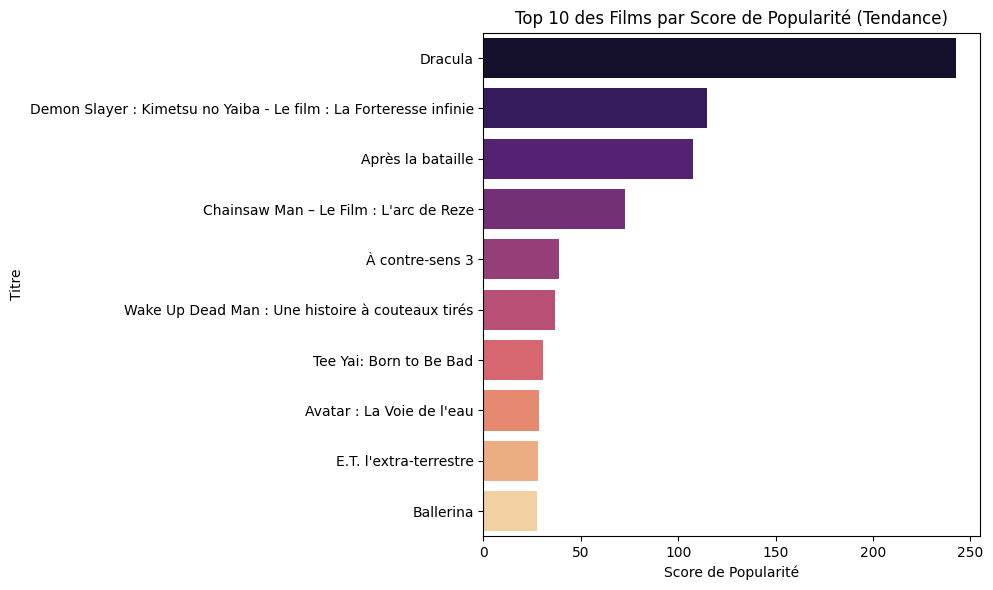

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PRÉPARATION (On reprend ton code de tri)
# On trie par popularité et on prend les 10 premiers
df_top_pop = df_clean.sort_values(by='popularité', ascending=False).head(10)

# 2. CRÉATION DU GRAPHIQUE
plt.figure(figsize=(10, 6))

# Graphique à barres horizontales
sns.barplot(data=df_top_pop, x='popularité', y='titre', palette='magma')

plt.title('Top 10 des Films par Score de Popularité (Tendance)')
plt.xlabel('Score de Popularité')
plt.ylabel('Titre')
plt.tight_layout()
plt.show()

Le Top Popularité : Ce sont souvent les films "Tendances" ou qui génèrent beaucoup d'activité récemment

# Top votes

In [ ]:
#  trier par 'nombre de votes' en descendant (du Top 1 vers le bas)
df_plus_votes = df_clean.sort_values(by='nombre de votes', ascending=False)

#  afficher le résultat (Titre et Nombre de votes)
df_plus_votes[['titre', 'nombre de votes']].head(10)

,titre,nombre de votes
2761,The Dark Knight : Le Chevalier noir,34713
4202,Django Unchained,27249
3160,Le Seigneur des anneaux : La Communauté de l'a...,26608
3386,Harry Potter et la Coupe de feu,21591
4383,Dunkerque,17113
264,Rogue One : A Star Wars Story,15970
2641,Charlie et la chocolaterie,15751
1807,Black Swan,15132
1161,Pirates des Caraïbes : Jusqu'au bout du monde,15033
1814,Blade Runner,14490


/tmp/ipython-input-3546099806.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_films, x='nombre de votes', y='titre', palette='viridis')


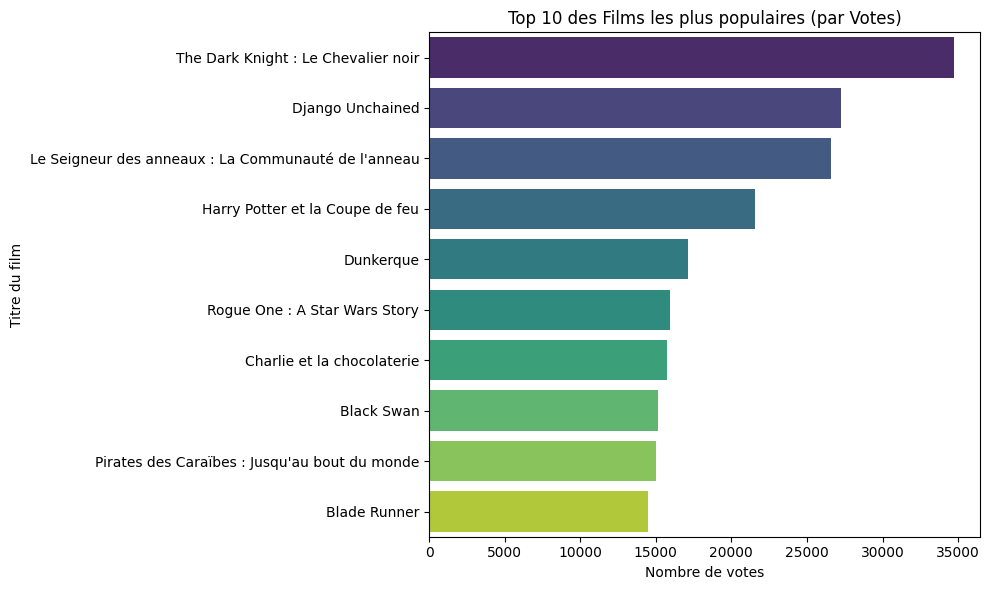

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TON TRI (On reprend ta logique exacte)
# On trie du plus grand au plus petit
df_plus_votes = df_clean.sort_values(by='nombre de votes', ascending=False)

# 2. ON PREND LE TOP 10
# (Sinon le graphique serait illisible avec 4000 films !)
top_10_films = df_plus_votes.head(10)

# 3. CRÉATION DU GRAPHIQUE
plt.figure(figsize=(10, 6))

# On utilise 'barplot' (Diagramme à barres)
# y=titre : Pour mettre les titres à gauche (horizontal)
# x=nombre de votes : Pour la longueur de la barre
sns.barplot(data=top_10_films, x='nombre de votes', y='titre', palette='viridis')

plt.title('Top 10 des Films les plus populaires (par Votes)')
plt.xlabel('Nombre de votes')
plt.ylabel('Titre du film')
plt.tight_layout() # Empêche les noms d'être coupés
plt.show()

Le Top Votes : Ce sont les "Monuments" du cinéma (ceux que le plus de gens ont vus sur le long terme).

# Acteurs ayant fait le plus de votes

In [ ]:
#  trier par 'nombre de votes' (Du plus grand au plus petit)

df_popularite = df_clean.sort_values(by='nombre de votes', ascending=False)

#  sélectionner les colonnes intéressantes
colonnes_a_afficher = ['acteurs', 'titre', 'nombre de votes']

#  afficher le Top 10
display(df_popularite[colonnes_a_afficher].head(10))

,acteurs,titre,nombre de votes
2761,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",The Dark Knight : Le Chevalier noir,34713
4202,"['Jamie Foxx', 'Christoph Waltz', 'Leonardo Di...",Django Unchained,27249
3160,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...",Le Seigneur des anneaux : La Communauté de l'a...,26608
3386,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",Harry Potter et la Coupe de feu,21591
4383,"['Fionn Whitehead', 'Tom Hardy', 'Mark Rylance...",Dunkerque,17113
264,"['Felicity Jones', 'Diego Luna', 'Alan Tudyk',...",Rogue One : A Star Wars Story,15970
2641,"['Johnny Depp', 'Freddie Highmore', 'David Kel...",Charlie et la chocolaterie,15751
1807,"['Natalie Portman', 'Mila Kunis', 'Vincent Cas...",Black Swan,15132
1161,"['Johnny Depp', 'Geoffrey Rush', 'Orlando Bloo...",Pirates des Caraïbes : Jusqu'au bout du monde,15033
1814,"['Harrison Ford', 'Rutger Hauer', 'Sean Young'...",Blade Runner,14490


/tmp/ipython-input-836187891.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_acteurs.values, y=top_acteurs.index, palette='rocket')


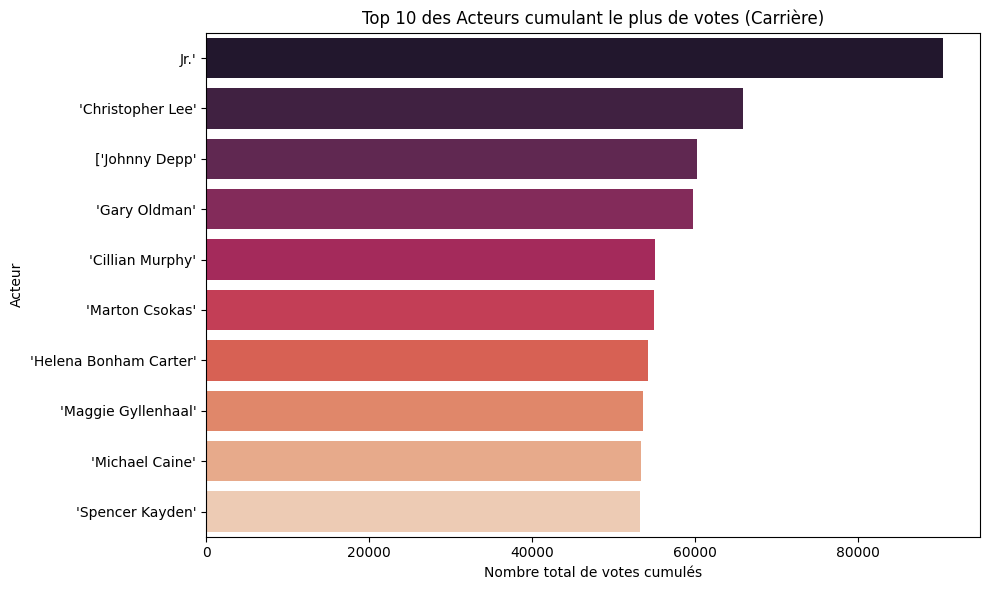

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ÉTAPE 1 : SÉPARATION DES ACTEURS (Le nettoyage) ---

# On copie les colonnes utiles
df_acteurs = df_clean[['acteurs', 'nombre de votes']].copy()

# 1. On transforme le texte "Acteur A, Acteur B" en une liste ["Acteur A", "Acteur B"]
df_acteurs['acteurs'] = df_acteurs['acteurs'].str.split(',')

# 2. LA COMMANDE MAGIQUE : On "explose" la liste pour avoir une ligne par acteur
df_acteurs_explose = df_acteurs.explode('acteurs')

# 3. On nettoie les petits espaces (ex: " Brad Pitt" devient "Brad Pitt")
df_acteurs_explose['acteurs'] = df_acteurs_explose['acteurs'].str.strip()


# --- ÉTAPE 2 : LE CALCUL (Somme des votes) ---

# On regroupe par acteur et on additionne tous les votes de leur carrière
top_acteurs = df_acteurs_explose.groupby('acteurs')['nombre de votes'].sum().sort_values(ascending=False).head(10)


# --- ÉTAPE 3 : LE GRAPHIQUE ---

plt.figure(figsize=(10, 6))

# On dessine le Top 10
sns.barplot(x=top_acteurs.values, y=top_acteurs.index, palette='rocket')

plt.title('Top 10 des Acteurs cumulant le plus de votes (Carrière)')
plt.xlabel('Nombre total de votes cumulés')
plt.ylabel('Acteur')
plt.tight_layout()
plt.show()

## Distribution des notes

In [ ]:
# 1. Calcul de la moyenne sur la colonne des notes ('votes')
# 'utiliser df_clean pour ne pas compter les films vides
moyenne_globale = df_clean['votes'].mean()

# 2. Affichage propre
# la fonction round(chiffre, 2) garde 2 chiffres après la virgule
print(f"La note moyenne de tous les films de la base est de : {round(moyenne_globale, 2)} / 10")

La note moyenne de tous les films de la base est de : 5.63 / 10


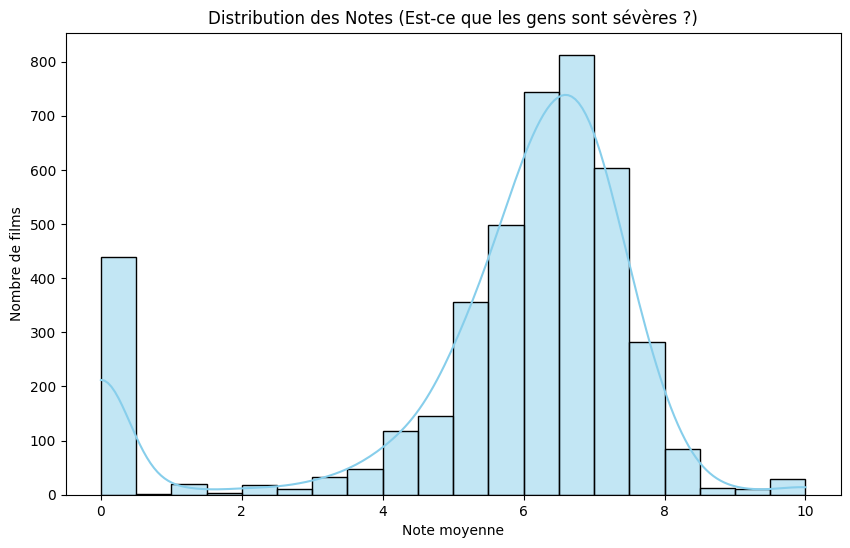

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la taille des graphiques
plt.figure(figsize=(10, 6))

# L'histogramme
sns.histplot(data=df_clean, x='votes', bins=20, kde=True, color='skyblue')

plt.title('Distribution des Notes (Est-ce que les gens sont sévères ?)')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()

# L'Évolution du Cinéma (L'analyse Temporelle)

Pourquoi ? L'application doit-elle recommander des vieux films ? Y a-t-il eu une explosion de la production à une certaine époque ? Cela permettra de créer un filtre "Années 90" ou "Années 2000" pertinent dans Streamlit.

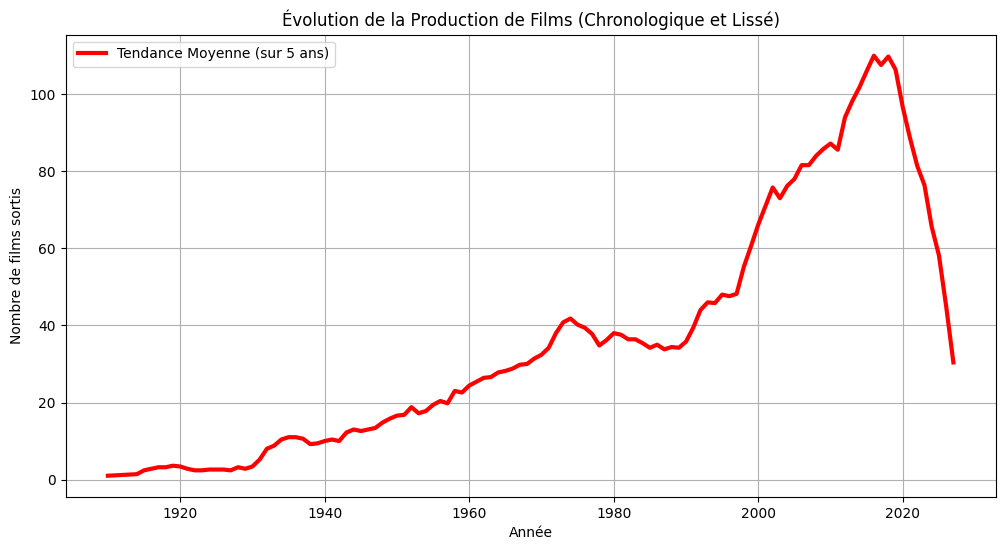

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. PRÉPARATION (Nécessaire après redémarrage du moteur) ---

# Rechargement des données (à adapter si le lien a changé)
link = "https://raw.githubusercontent.com/jennykarim45-ai/projet_recommandation_films/refs/heads/main/films_final.csv"
df = pd.read_csv(link)

# Nettoyage de la colonne 'année' originale (crée la colonne 'année_clean')
# On extrait les 4 chiffres de l'année des dates (ex: "28-05-1974" devient 1974)
df_clean['année_clean'] = df_clean['année'].astype(str).str.extract(r'(\d{4})')
df_clean['année_clean'] = pd.to_numeric(df_clean['année_clean'], errors='coerce')

# Filtre de propreté (crée le df_clean en supprimant les films à 0 vote)
#df_clean = df[df['nombre de votes'] > 0].copy()

# --- 2. TRAITEMENT CHRONOLOGIQUE ET LISSAGE ---

# 1. On regroupe par année (utilise la colonne propre qui existe maintenant !)
films_par_annee = df_clean.groupby('année_clean').size()

# 2. La clé : On trie l'index numériquement (pour la chronologie)
films_par_annee.index = films_par_annee.index.astype(int)
films_par_annee = films_par_annee.sort_index()

# 3. Calcul de la Moyenne Mobile (Lissage sur 5 ans)
moyenne_mobile = films_par_annee.rolling(window=5).mean()

# --- 3. AFFICHAGE DU GRAPHIQUE ---

plt.figure(figsize=(12, 6))

# On affiche la courbe lissée (la vraie tendance)
moyenne_mobile.plot(kind='line', color='red', linewidth=3, label='Tendance Moyenne (sur 5 ans)')

plt.title('Évolution de la Production de Films (Chronologique et Lissé)')
plt.xlabel('Année')
plt.ylabel('Nombre de films sortis')
plt.legend()
plt.grid(True)
plt.show()

# Les Corrélations (Y a-t-il des liens cachés ?)
Est-ce que les films longs sont mieux notés ? Est-ce que les films populaires sont forcément les meilleurs ? Si tu vois une forte corrélation, tu pourras dire dans ton app : "Attention, ce film est long, mais c'est souvent bon signe !".

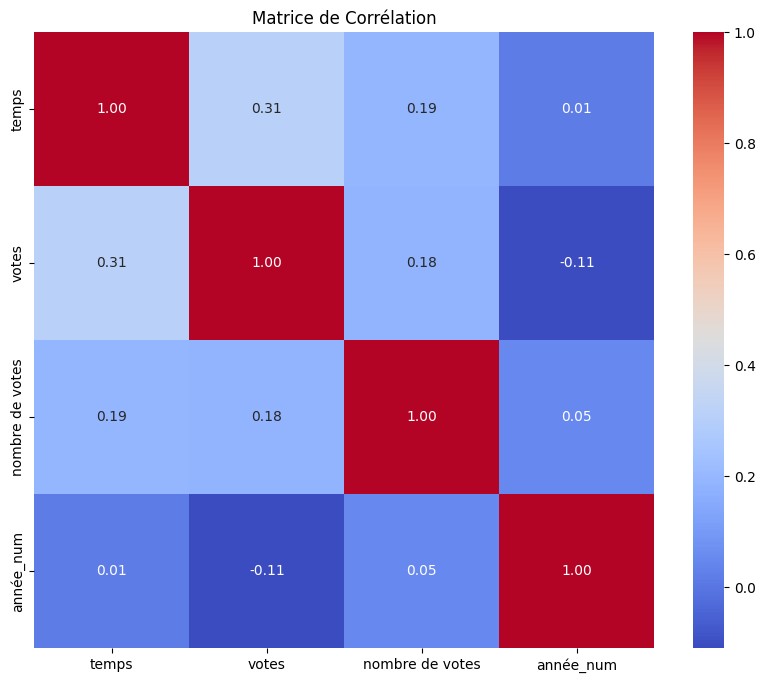

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. NETTOYAGE DE LA COLONNE ANNÉE
# On dit à Python : "Si tu vois une date complète, essaie d'extraire juste l'année (4 chiffres)"
# (On utilise une astuce regex : \d{4} veut dire "4 chiffres à la suite")
df_clean['année_num'] = df_clean['année'].astype(str).str.extract(r'(\d{4})')

# On convertit en vrai nombre. Si ça rate, ça mettra "Vide" (NaN)
df_clean['année_num'] = pd.to_numeric(df_clean['année_num'], errors='coerce')

# 2. PRÉPARATION DES DONNÉES
# On sélectionne les colonnes chiffrées (en prenant la nouvelle année propre)
chiffres = df_clean[['temps', 'votes', 'nombre de votes', 'année_num']].dropna()

# 3. CRÉATION DU GRAPHIQUE
plt.figure(figsize=(10, 8))

# Calcul de la corrélation
matrice_corr = chiffres.corr()

# Affichage de la Heatmap
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matrice de Corrélation')
plt.show()

# Le top Genres


/tmp/ipython-input-1108753164.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compte_genres.values, y=compte_genres.index, palette='viridis')


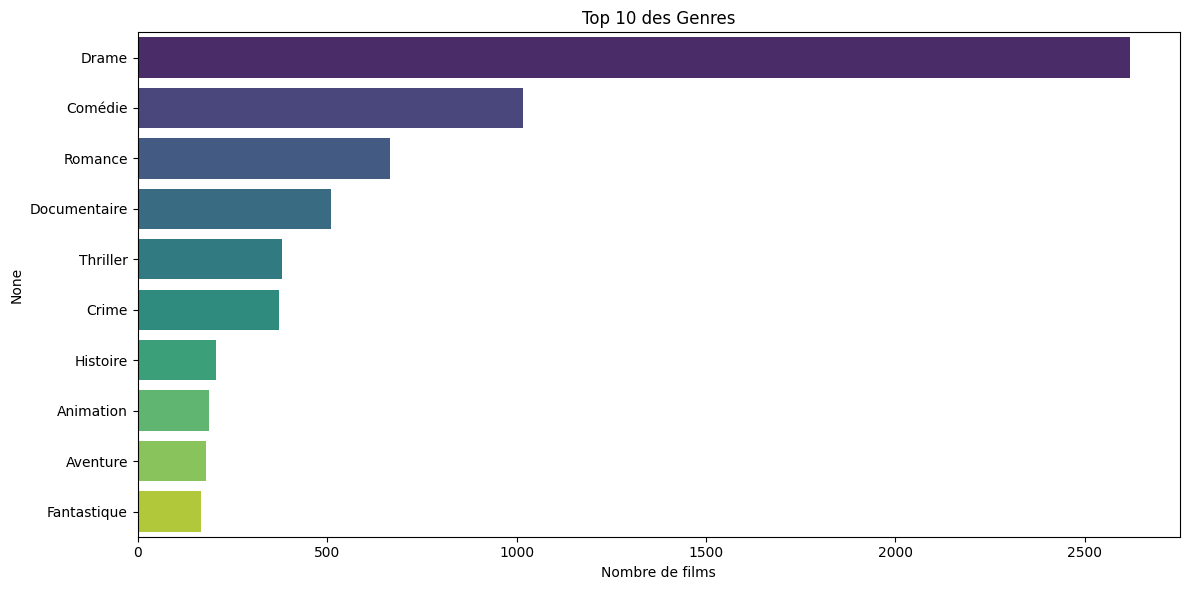

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. LE RASSEMBLEMENT
tous_les_genres = pd.concat([df_clean['genre_1'], df_clean['genre_2'], df_clean['genre_3']])

# 2. LE GRAND NETTOYAGE (C'est ici que ça se joue)
# A. On enlève les "NaN" (les vides techniques de Python)
tous_les_genres = tous_les_genres.dropna()

# B. On s'assure que tout est du texte propre
tous_les_genres = tous_les_genres.astype(str).str.strip()

# C. LA LIGNE MAGIQUE : On garde tout CE QUI N'EST PAS VIDE
# On dit : Garde seulement si la longueur du mot est supérieure à 1 lettre
tous_les_genres = tous_les_genres[tous_les_genres.str.len() > 1]

# 3. LE COMPTAGE
compte_genres = tous_les_genres.value_counts().head(10)

# 4. LE GRAPHIQUE
plt.figure(figsize=(12, 6))
sns.barplot(x=compte_genres.values, y=compte_genres.index, palette='viridis')

plt.title('Top 10 des Genres')
plt.xlabel('Nombre de films')
plt.tight_layout() # Pour ne pas couper le texte à gauche
plt.show()